### Installing of Requirements (only run this if you haven't installed the necessary libraries found in requirements.txt)

In [1]:
# !pip install -r requirements.txt

In [1]:
import geopandas as  gpd
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\Sean\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Todo
- convert all geojson files into 1 geodataframe 
- data cleaning
- clip the inputs onto the map layer, similar to getting the intersection between the points and the map layer
- return the output onto a file
- write documentation in this notebook if necessary

### Reading the Paranaque Images and Saving a compiled GEOJSON file of the images 

In [3]:
# Accessing the data of Paranque images
# paranaque_json_dir = 'data/mapillary/paranaque'

# os.chdir(paranaque_json_dir)

In [4]:
# gdf_list = []
# geojson_Count = 0

In [5]:
# for file in os.listdir(paranaque_json_dir):
#     if file.endswith('.geojson'):
#         gdf = gpd.read_file(file)
#         geojson_Count += 1
        
#         # filter out null json files
#         if '"features": []' not in gdf:
#             gdf = gpd.read_file(file)
#             gdf_list.append(gdf)
            

In [6]:
# Run this if you want to view the compiled json

# gdf_list

### Saving the compiled images into a GeoDataFrame in a GEOJSON file

In [7]:
# output_dir = 'output_geojson'
# os.makedirs(output_dir, exist_ok=True)

# merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
# output_filename = 'output_geojson/merged_paranaque.geojson'
# merged_gdf.to_file(output_filename, driver='GeoJSON')
# print(f"Saved {output_filename}")

#the file is found in a folder that can be viewed in the data/paranaque folder as "output_geojson"

In [8]:
# %pip install imagehash

In [9]:
# import os
# import pandas as pd
# import geopandas as gpd
# from PIL import Image
# import imagehash

# def hash_image(file_path):
#     """
#     Compute a hash for an image file.
#     """
#     with Image.open(file_path) as img:
#         return imagehash.average_hash(img)

# def filter_similar_images(gdf_list):
#     """
#     Filter out similar images based on their hash.
#     """
#     filtered_gdf_list = []
#     hash_set = set()

#     for gdf in gdf_list:
#         file_path = gdf['thumb_2048_url']  # Replace 'your_image_column' with the column containing image file paths
#         file_hash = hash_image(file_path)

#         if file_hash not in hash_set:
#             hash_set.add(file_hash)
#             filtered_gdf_list.append(gdf)

#     return filtered_gdf_list

In [10]:
# %pip install tensorflow

In [11]:
# os.getcwd()

In [12]:
# os.chdir('..')

# CREATING THE SIMILARITY MODEL

In [14]:
# filtered_gdf_list = filter_similar_images(gdf_list)

# output_dir = 'output_geojson'
# os.makedirs(output_dir, exist_ok=True)

# merged_gdf = gpd.GeoDataFrame(pd.concat(filtered_gdf_list, ignore_index=True), crs=filtered_gdf_list[0].crs)
# output_filename = 'output_geojson/merged_paranaque.geojson'
# merged_gdf.to_file(output_filename, driver='GeoJSON')
# print(f"Saved {output_filename}")


In [2]:
# img_df = pd.read_csv("paranaque.csv")
# img_df

,img1,img2,label
0,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
1,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
2,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
3,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
4,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
...,...,...,...
232,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,1
233,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,1
234,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,1
235,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,1


In [4]:
import requests
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from io import BytesIO

# Define the model
def build_siamese_network(input_shape):
    left_input = layers.Input(shape=input_shape)
    right_input = layers.Input(shape=input_shape)

    # Shared convolutional layers
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))

    # Encoding for both left and right inputs
    encoded_left = model(left_input)
    encoded_right = model(right_input)

    # L1 distance layer between the two encoded representations
    L1_layer = layers.Lambda(lambda tensors: tf.abs(tensors[0] - tensors[1]))

    # Add the distance layer to the network
    L1_distance = L1_layer([encoded_left, encoded_right])

    # Prediction layer
    prediction = layers.Dense(1, activation='sigmoid')(L1_distance)

    # Create and compile the model
    siamese_model = models.Model(inputs=[left_input, right_input], outputs=prediction)
    siamese_model.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

    return siamese_model

def preprocess_image_from_url(image_url, target_size):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = tf.cast(img_array, tf.float32) / 255.0  # Normalize pixel values to be between 0 and 1
    return img_array


In [3]:
# input_shape = (237 , 237 , 3)  # Adjust input shape based on your images
# target_size = (237 , 237 ) 

In [ ]:

# img1 = np.array([preprocess_image_from_url(row, target_size) for row in img_df['img1'].tolist()])
# img2 = np.array([preprocess_image_from_url(row, target_size) for row in img_df['img2'].tolist()])

# labels = np.array(img_df['label'].tolist())

# img1 = img1.reshape((-1,) + img1.shape[2:])
# img2 = img2.reshape((-1,) + img2.shape[2:])


In [15]:
# # Compile the model
# siamese_model = build_siamese_network(input_shape)

# # siamese_model = create_siamese_network(input_shape)
# siamese_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# siamese_model.summary()


# # Training the Siamese network with your image pairs and similarity scores
# # X_train_image1, X_train_image2 are the image pairs, and y_train is the similarity score (1 or 0)
# siamese_model.fit([img1, img2], labels, epochs=50, batch_size=32)

# # After training, you can use the model to predict the similarity between two new images
# # similarity_score = siamese_model.predict([image1, image2])

In [16]:
# # Assuming you have a trained Siamese model named 'siamese_model'

# # Load and preprocess two new images from URLs
# new_image1_url = "https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t6/An9p5poMGx43oI2-KIdMOBb2EVLa--84-2kdezmRT5F7Wge0ZaCKsYu6fCzA96HaWjiYNZB_Kpy-3Jz1OYpnb-G-1ZpI91XJuilqNReu0Zp7quBBf_c4U34OcY_woufUSc66LXv5DVWjG1UoDks_lQ?stp=s2048x1152&ccb=10-5&oh=00_AfBJEHFmkp-Ri2eXF_Q6HJm3gNzbQhvrVAf7Dsi566DksQ&oe=65CEC55A&_nc_sid=201bca"
# new_image2_url = "https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t6/An_LF2eubR5Wlwzl_ODdgppINVi5OZYDQLP5lPZZZ_Qs6go4pOdbXf3X6dP7KOKbPqjfWohcNmyonaByk5lRrg1Q0AXK3tegqET81QF9ID3gMoIqpt3s54eL7QdPs2NI_N3DEgHaE5pBKA5OlR6Oloc?stp=s2048x1152&ccb=10-5&oh=00_AfD3ZD_dGPj-gpe1U665FQPOPJUSGTzcHmoM_zkwS4Zjug&oe=65CEE44C&_nc_sid=201bca"

# new_image1 = preprocess_image_from_url(new_image1_url, target_size)
# new_image2 = preprocess_image_from_url(new_image2_url, target_size)

# # Make predictions using the trained model
# predictions = siamese_model.predict([new_image1, new_image2])

# # Interpret the predictions
# similarity_probability = predictions[0][0]

# print(similarity_probability)

# # # Threshold for similarity (you can adjust this based on your needs)
# similarity_threshold = 0.40

# if similarity_probability >= similarity_threshold:
#     print("The images are similar.")
# else:
#     print("The images are dissimilar.")


# TRAINING THE MODEL

## FOR PARANAQUE IMAGES

In [ ]:
# paranaque_df = pd.read_csv("paranaque.csv")

# X = paranaque_df[["img1", "img2"]]
# y = paranaque_df["label"]

In [ ]:
# input_shape = (238 , 238 , 3)  # Adjust input shape based on your images
# target_size = (238 , 238 ) 

## FOR PARANAQUE AND PASIG IMAGES

In [22]:
# combine pasig and paranaque csv files into 1 dataframe

df1 = pd.read_csv("paranaque.csv")
df2 = pd.read_csv("pasig.csv")

frames = [df1, df2]
result_df = pd.concat(frames, ignore_index=True)


X = result_df[["img1", "img2"]]
y = result_df["label"]

,img1,img2,label
0,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
1,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
2,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
3,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
4,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
...,...,...,...
434,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,0
435,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,0
436,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,0
437,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,0


In [ ]:
# input_shape = (439 , 439 , 3)  # Adjust input shape based on your images
# target_size = (439 , 439 ) 

In [24]:
# train test split 70 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(X_train), len(y_train), len(X_test), len(y_test))

307 307 132 132


In [25]:
# Run the model through each image
img1_train = np.array([preprocess_image_from_url(row, target_size) for row in X_train["img1"].tolist()])
img2_train = np.array([preprocess_image_from_url(row, target_size) for row in X_train["img2"].tolist()])

In [26]:
img1_train = img1_train.reshape((-1,) + img1_train.shape[2:])
img2_train = img2_train.reshape((-1,) + img2_train.shape[2:])

In [27]:
y_train = np.array(y_train.tolist())

In [28]:
# Compile the model
siamese_model = build_siamese_network(input_shape)

# siamese_model = create_siamese_network(input_shape)
siamese_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

siamese_model.summary()

# Training the Siamese network with your image pairs and similarity scores
# X_train_image1, X_train_image2 are the image pairs, and y_train is the similarity score (1 or 0)
siamese_model.fit([img1_train, img2_train], y_train, epochs=50, batch_size=32)

# After training, you can use the model to predict the similarity between two new images
# similarity_score = siamese_model.predict([image1, image2])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 237, 237, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 237, 237, 3)]        0         []                            
                                                                                                  
 sequential_1 (Sequential)   (None, 128)                  2663532   ['input_3[0][0]',             
                                                          8          'input_4[0][0]']             
                                                                                                  
 lambda_1 (Lambda)           (None, 128)                  0         ['sequential_1[0][0]',  

# TESTING THE MODEL

In [30]:
img1_test = np.array([preprocess_image_from_url(row, target_size) for row in X_test["img1"].tolist()])
img2_test = np.array([preprocess_image_from_url(row, target_size) for row in X_test["img2"].tolist()])

In [31]:
y_test = np.array(y_train.tolist())

In [32]:
img1_test = img1_test.reshape((-1,) + img1_test.shape[2:])
img2_test = img2_test.reshape((-1,) + img2_test.shape[2:])

In [33]:
predictions = siamese_model.predict([img1_test, img2_test])

len(predictions)

5/5 [==============================] - 1s 89ms/step


132

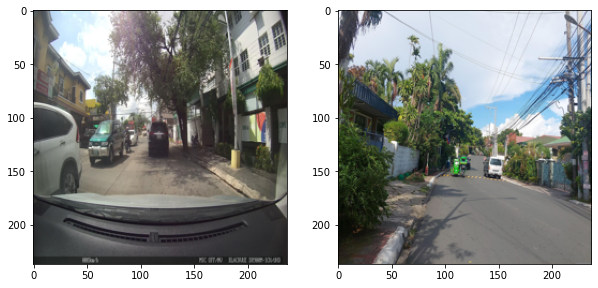

Similarity Score = [3.7272187e-06]
DISSIMILAR


Press Enter to continue to the next iteration...,   q to exit q


In [67]:
from IPython.display import display, clear_output

for i in range(len(predictions)):
    fig, axes = plt.subplots(1,2, figsize=(10, 5))
    axes[0].imshow(img1_test[i])
    axes[1].imshow(img2_test[i])
    
    display(fig)
    print("Similarity Score =", predictions[i])
    if(predictions[i] >= 0.20):
        print("SIMILAR")
    else:
        print("DISSIMILAR")
    user_input = input("Press Enter to continue to the next iteration...,   q to exit: ")
    clear_output(wait=True)
    plt.close(fig)
    if user_input.lower() == 'q':
        break

# COMPILING UNIQUE IMAGES

In [90]:
import geopandas as gpd
import os

In [99]:
paranaque_json_dir = 'data/mapillary/paranaque'
paranaque_gdf_list = []
geojson_Count = 0

for file in os.listdir(paranaque_json_dir):
    if file.endswith('.geojson'):
        geojson_Count += 1
        file_path = os.path.join(paranaque_json_dir, file)

        # Read GeoJSON file into a GeoDataFrame
        gdf = gpd.read_file(file_path)

        # Check if GeoDataFrame is not empty
        if not gdf.empty:
            paranaque_gdf_list.append(gdf)

# Print the count of GeoJSON files and the length of gdf_list
print("Number of GeoJSON files:", geojson_Count)
print("Number of non-empty GeoDataFrames:", len(paranaque_json_dir))


Number of GeoJSON files: 4002
Number of non-empty GeoDataFrames: 24


In [98]:
pasig_json_dir = 'data/mapillary/pasig'
pasig_gdf_list = []
geojson_Count = 0

for file in os.listdir(pasig_json_dir):
    if file.endswith('.geojson'):
        geojson_Count += 1
        file_path = os.path.join(pasig_json_dir, file)

        # Read GeoJSON file into a GeoDataFrame
        gdf = gpd.read_file(file_path)

        # Check if GeoDataFrame is not empty
        if not gdf.empty:
            pasig_gdf_list.append(gdf)

# Print the count of GeoJSON files and the length of gdf_list
print("Number of GeoJSON files:", geojson_Count)
print("Number of non-empty GeoDataFrames:", len(pasig_gdf_list))


Number of GeoJSON files: 2377
Number of non-empty GeoDataFrames: 1156


In [101]:
# pasig_gdf_list

In [104]:
combined_gdf_list = paranaque_gdf_list + pasig_gdf_list

combined_gdf = pd.concat(combined_gdf_list, ignore_index=True)

# Keep only the "thumb_2048_url" column
combined_gdf = combined_gdf[["thumb_2048_url"]]

combined_gdf = combined_gdf.dropna(subset=["thumb_2048_url"])

# Print the combined GeoDataFrame
print(combined_gdf)

                                           thumb_2048_url
0       https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...
1       https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...
2       https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...
3       https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...
4       https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...
...                                                   ...
719764  https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...
719765  https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...
719767  https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...
719768  https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...
719770  https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...

[680486 rows x 1 columns]


In [135]:
urls = combined_gdf["thumb_2048_url"].tolist()


In [ ]:
result_list = []

for index, url in enumerate(urls):
    if index == 0:
        result_list.append(url)
        print(f"Processing URL: {url}")
    else:
        img1 = preprocess_image_from_url(url, target_size)
        img1 = tf.squeeze(img1)
        
        for image in result_list:
            image = preprocess_image_from_url(image, target_size)
            image = tf.squeeze(image)
            prediction = siamese_model.predict([image, img1])
            print(prediction)
            
            if(prediction<= 0.20):
                result_list.append(url)
                break
            
        break
        

Processing URL: https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t6/An-MdBdRX5Hzq9oRf2IHmpnkJ8LPq9LjrwZS9DDCE6h58gxSosoog9rYd5aXMDu0fqtErYpoBNJ8prUpfIWeGCRp2lxymbHQs7pfdr29qRO3wlcMifJmFbXkgN9hRMQ8_J9EnQIXI3FHYMvEN-H7wmY?stp=s2048x1536&ccb=10-5&oh=00_AfArRH9SkJK2giy-QN5yhAi95c8DMgaJVASfQQQJRNwS-Q&oe=65CEB564&_nc_sid=201bca


In [ ]:
predictions = siamese_model.predict([img1_test, img2_test])

In [124]:
testing = np.array([preprocess_image_from_url(url, target_size) for url in urls[:1]])

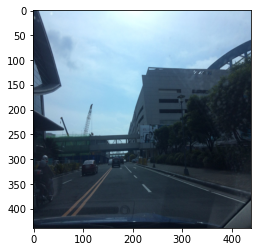

In [128]:
# first_image = testing[0]

# # Remove the first dimension with size 1
# first_image = first_image.squeeze()

# # Display the image using Matplotlib
# plt.imshow(first_image)
# plt.show()

In [111]:
images = np.array([preprocess_image_from_url(url, target_size) for url in urls])

KeyboardInterrupt: 

In [70]:
X1 = np.array([preprocess_image_from_url(row, target_size) for row in X["img1"].tolist()])
X2 = np.array([preprocess_image_from_url(row, target_size) for row in X["img2"].tolist()])

X1 = img1_train.reshape((-1,) + X1.shape[2:])
X2 = img2_train.reshape((-1,) + X2.shape[2:])

KeyboardInterrupt: 

In [ ]:
y = np.array(y.tolist())

In [ ]:
# Compile the model
siamese_model = build_siamese_network(input_shape)

# siamese_model = create_siamese_network(input_shape)
siamese_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

siamese_model.summary()

# Training the Siamese network with your image pairs and similarity scores
# X_train_image1, X_train_image2 are the image pairs, and y_train is the similarity score (1 or 0)
siamese_model.fit([X1, X2], y_train, epochs=50, batch_size=32)

# After training, you can use the model to predict the similarity between two new images
# similarity_score = siamese_model.predict([image1, image2])